#  IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Any use of **auto-generated code** must be clearly identified, along with the tool or software used to generate it. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: October 9 2025, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

## What to deliver?

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program, with example runs.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: 
* Include example runs of your code by doing the reports described in the tasks. Simply implementing the code, but never running it will not give many points.
* Include the code that was used to make all reports. Do not include reports of performance and time without also including the code that was used to produce it.
* If you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You have to use Python to solve the assignment. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. The **itertools** module in Python provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


In [5]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)

In [6]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


In [ ]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

# IN4050
## Assignment 1
### John-Magnus Johnsen, johnmagj
#### Monday 13. october 2025

## 1. Exhaustive Search


First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

**Note:** To get distances between cities, use the dictionary `data` created by reading the file `european_cities.csv`. *Do not* calculate distances based on the coordinates. The actual distances do not only depend on the differences in the coordinates, but also of the curvature of the earth. The distances available in `data` are corrected for this, and contain the actual true distances.

<u>**Answer:**</u> From combinatorics we know that for $n$ cities, we have $n!$ permutations of possible routes to take (given we don't visit the same city twice). If we index each city with a number $k = 0, \dots, n-1$, an arbitrary route involving $6$ cites could then be described by the tuple: $(4, 5, 0, 3, 1, 2)$. With this idea, we could calculate the total distance for any particular route simply by adding the corresponding distance between cities, including the distance from the last city to be visited and back to the start. To keep track of routes and the corresponding total distance we create two numpy arrays, one keeping arrays of city indies (shape $(n!, n)$ for $n$ cities), and the other the travel distances (shape $(n!, 1)$). For the function calculating the distance between cities before adding them up, `calculate_travel_distance`, we make use of how the dataset is ordered, where each column represent a city, and a given row of that column denotes the travel distance to the city corresponding to that row. For an easier implementation we also consider a route to be from $(A, \dots, \text{final city})$, thus not including $A$ as the last city in the route, but still adding the distance back to $A$ in the total distance for the route. 

In [11]:
# Imports
import numpy as np
from scipy.special import factorial
from itertools import permutations
from itertools import islice

In [12]:
# Setup of data
cities_names_data = np.genfromtxt("european_cities.csv", delimiter=";", dtype=str)[0,:]                 # Store city names as strings
cities_distance_data = np.genfromtxt("european_cities.csv", delimiter=";", dtype=float)[1:,:]           # Store distances between cities as float
data = np.concatenate((cities_names_data.reshape(1,-1), cities_distance_data), axis=0, dtype=object)    # Combine for completeness

In [13]:
def create_random_city_subset(data, n_cities):
    """
    Create a smaller, random sample set of n cities from data.  
    """
    # Create list of n_cities with drawn indices from an array of data.shape[1] elements (number of cities), than sort the list of indices in increasing order
    random_city_indices = np.sort(np.random.choice(data.shape[1], n_cities, replace=False))

    # Pick out the city names according to the drawn indices
    # Pick out all the columns (excluded top row of city names) corresponding the drawn indices
    # Repeat for the rows, pick out the rows corresponding to the drawn indices
    sample_data_cities = data[0, random_city_indices].copy()
    sample_data_distances = data[1:, random_city_indices].copy()
    sample_data_distances = sample_data_distances[random_city_indices,:].copy()

    # Merge so that array of city names is put on top of 2D array of distances
    sample_data = np.concatenate((sample_data_cities.reshape(1,-1), sample_data_distances), axis=0, dtype=object)

    return sample_data

In [114]:
def create_routes(n):
    """Creates all permutations of routes for n cites. Return array of route arrays"""
    if n > 0 and type(n) == int:
        return np.array(list(permutations(range(0,n))))     # Create array with all permutations of the list [0, 1, 2, ..., n]
    else:
        raise ValueError("n must be an positive integer")

def calculate_travel_distance(routes, data):
    """Take array of routes, and data (only distances). Return array of total distance for each route in routes, having indices corresponding."""
    
    distances = np.zeros(len(routes))
                         
    for i, route in enumerate(routes):
        route_distance = 0
        for j in range(0, len(route)-1):
            route_distance += data[route[j+1], route[j]]    # Move to column in data representing current city, route[j], 
                                                            # the distance to the next city, route[j+1], is then located at that particular row in the data.
        route_distance += data[route[-1], route[0]]         # Add the distance between the final city visited, and the first city of the route
        distances[i] = route_distance

    return distances

def print_route_info(routes, distances, data_city_names):
    """Simply prints the info"""
    print(f"Distance shortest route ({len(data_city_names)} cities): {np.min(distances)}")
    print(f"Corresponds to route: {np.argmin(distances)}")
    print(f"City indices for route: {routes[np.argmin(distances)]}")
    print(f"City order of shortest route: {list(data_city_names[routes[np.argmin(distances)]])}")
    return None

def plot_route(route, data_city_names):
    """Take array route containing city indices and array of city names, and plot the corresponding route on map"""
    n_cities = len(route)
    # Create sub dict with names and coordinates of the first n_cities, this works since the coord. dict is sorted similar to the data
    coords = dict(islice(city_coords.items(), n_cities))

    # List the city names in order of the route
    list_shortest_route = list(data_city_names[route])   

    # Extract the city:coordinate pairs in accordance with the route, ordered as tuples in list
    list_sorted_coords = [(key, coords[key]) for key in list_shortest_route]

    # Turn list of tuples back to dict 
    sorted_coords = dict(list_sorted_coords)

    shortest_route = list(sorted_coords.keys()) # Gives us the cities in alphabetic order
    print(shortest_route)
    plot_plan(shortest_route)
    return None

For the 6 first cities:

In [115]:
n_cities = 6
data_city_names = data[0, :n_cities].copy()             # Name of the 6 first cities
data_distances = data[1:n_cities+1, :n_cities].copy()   # Distances between cites for the 6 first cites, distances only

routes = np.array(create_routes(data_distances.shape[1]))
distances = calculate_travel_distance(routes, data_distances)

print_route_info(routes, distances, data_city_names)

Distance shortest route (6 cities): 5018.8099999999995
Corresponds to route: 16
City indices for route: [0 1 4 5 2 3]
City order of shortest route: ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels']


['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels']


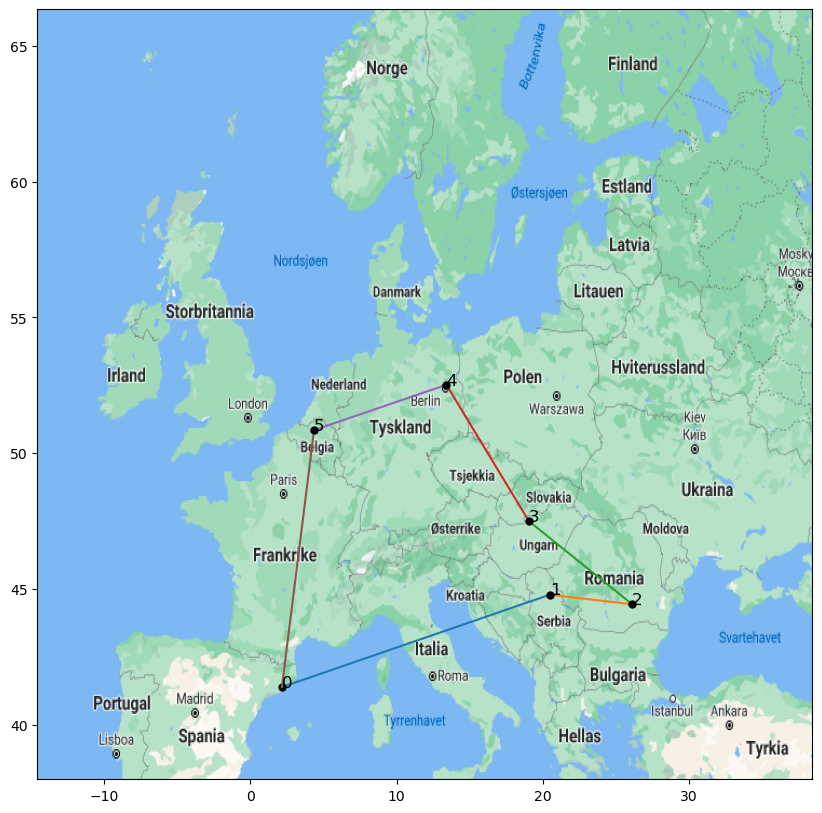

In [116]:
shortest_route = routes[16]
plot_route(shortest_route, data_city_names)

In [19]:
np.sort(distances)[:25]

array([5018.81, 5018.81, 5018.81, 5018.81, 5018.81, 5018.81, 5018.81,
       5018.81, 5018.81, 5018.81, 5018.81, 5018.81, 5135.74, 5135.74,
       5135.74, 5135.74, 5135.74, 5135.74, 5135.74, 5135.74, 5135.74,
       5135.74, 5135.74, 5135.74, 5270.45])

We see that for the 6 cities, there are 12 routes that yield the same total travel distance. This is maybe not so surprising since the optimal route will be a closed loop, and thus not affected by the staring point (six different), nor the direction taken (two directions for each route). We also see that this repeats for the second shortest route and so on. This means that the TSP problem can be reduced, only having to calculate the distance for a subset of all possible routes, $n!$. This could be done by for instance decide on a starting point and keep this fixed, then the there would be one less city to check for, $(n-1)$. Also, since all 

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

For the first 10 cities:

In [119]:
n_cities = 10
data_city_names = data[0, :n_cities].copy()
data_distances = data[1:n_cities+1, :n_cities].copy()

routes = np.array(create_routes(data_distances.shape[1]))
distances = calculate_travel_distance(routes, data_distances)

print_route_info(routes, distances, data_city_names)

Distance shortest route (10 cities): 7486.309999999999
Corresponds to route: 2478261
City indices for route: [6 8 3 7 0 1 9 4 5 2]
City order of shortest route: ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin']


['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin']


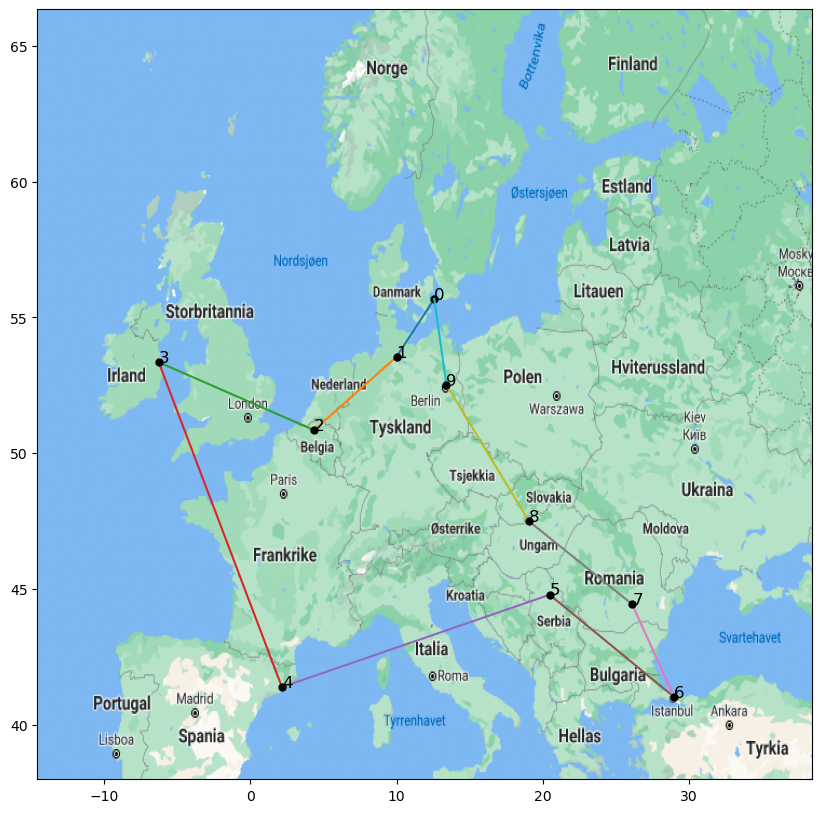

In [120]:
# Create sub dict with names and coordinates of the first 10 cities, this works since the coord. dict is sorted similar to the data
coords = dict(islice(city_coords.items(), n_cities))

# List the city names in order of the route
list_shortest_route = list(data_city_names[routes[np.argmin(distances)]])   

# Extract the city:coordinate pairs in accordance with the route, ordered as tuples in list
list_sorted_coords = [(key, coords[key]) for key in list_shortest_route]

# Turn list of tuples back to dict 
sorted_coords = dict(list_sorted_coords)

best_route = list(sorted_coords.keys()) # Gives us the cities in alphabetic order
print(best_route)
plot_plan(best_route)

In [24]:
np.sort(distances)[:50]

array([7486.31, 7486.31, 7486.31, 7486.31, 7486.31, 7486.31, 7486.31,
       7486.31, 7486.31, 7486.31, 7486.31, 7486.31, 7486.31, 7486.31,
       7486.31, 7486.31, 7486.31, 7486.31, 7486.31, 7486.31, 7503.1 ,
       7503.1 , 7503.1 , 7503.1 , 7503.1 , 7503.1 , 7503.1 , 7503.1 ,
       7503.1 , 7503.1 , 7503.1 , 7503.1 , 7503.1 , 7503.1 , 7503.1 ,
       7503.1 , 7503.1 , 7503.1 , 7503.1 , 7503.1 , 7549.16, 7549.16,
       7549.16, 7549.16, 7549.16, 7549.16, 7549.16, 7549.16, 7549.16,
       7549.16])

In [26]:
distances[np.argmin(distances)-7:np.argmin(distances)+7]

array([10550.11,  8039.19, 10529.47,  8022.57, 10037.32,  9993.21,
        8797.22,  7486.31,  9976.59,  8709.79,  9686.12,  8486.11,
        8936.05,  8915.41])

<u>**Answer:**</u> An exhaustive search for all the 24 cites would take ...

We also se that the chosen shortest route, even tho multiple optimal routes exist, appear isolated in the `distances` array. This is due to how the routes are generated through computing permutations of routes, and thus the optimal routes could be located in different parts of the array. 

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

In [46]:
n_cities = 10
data_city_names = data[0, :n_cities].copy()
data_distances = data[1:n_cities+1, :n_cities].copy()   

In [ ]:
def simple_hill_climb(data_distances):
    n_cities = data_distances.shape[0]

    initial_route = np.array(np.random.choice(n_cities, n_cities, replace=False))   # Generate a random route 
    initial_route = initial_route.reshape(1,-1)                                     # Reshape to explicit row vector in order to work with the calculate_travel_distance func

    best_route = initial_route
    best_route_distance = calculate_travel_distance(best_route, data_distances) 
    counter = 0
    while counter < 100:    
        a, b, c = np.random.choice(n_cities, 3, replace=False)                  # Generate 3 random and unique indices

        alt_best_routes = np.ones([3, n_cities], dtype=int)*best_route.copy()   # Create array containing the best route on each row
        # Swap value of two random indices for three copies of the current best route 
        alt_best_routes[0, a], alt_best_routes[0, b] = alt_best_routes[0, b], alt_best_routes[0, a]
        alt_best_routes[1, b], alt_best_routes[1, c] = alt_best_routes[1, c], alt_best_routes[1, b]
        alt_best_routes[2, a], alt_best_routes[2, c] = alt_best_routes[2, c], alt_best_routes[2, a]

        alt_distances = calculate_travel_distance(alt_best_routes, data_distances)

        if np.min(alt_distances) < best_route_distance:
            min_indx = np.argmin(alt_distances)

            best_route = alt_best_routes[min_indx].reshape(1,-1)
            best_route_distance = alt_distances[min_indx]

        else:
            counter += 1

    return

In [ ]:
initial_route = np.array(np.random.choice(n_cities, n_cities, replace=False))   # Generate a random route 
initial_route = initial_route.reshape(1,-1)                                     # Reshape to explicit row vector in order to work with the calculate_travel_distance func

best_route = initial_route
best_route_distance = calculate_travel_distance(best_route, data_distances) 
counter = 0
while counter < 100:    
    a, b, c = np.random.choice(n_cities, 3, replace=False)                  # Generate 3 random and unique indices

    alt_best_routes = np.ones([3, n_cities], dtype=int)*best_route.copy()   # Create array containing the best route on each row
    # Swap value of two random indices for three copies of the current best route 
    alt_best_routes[0, a], alt_best_routes[0, b] = alt_best_routes[0, b], alt_best_routes[0, a]
    alt_best_routes[1, b], alt_best_routes[1, c] = alt_best_routes[1, c], alt_best_routes[1, b]
    alt_best_routes[2, a], alt_best_routes[2, c] = alt_best_routes[2, c], alt_best_routes[2, a]

    alt_distances = calculate_travel_distance(alt_best_routes, data_distances)

    if np.min(alt_distances) < best_route_distance:
        min_indx = np.argmin(alt_distances)

        best_route = alt_best_routes[min_indx].reshape(1,-1)
        best_route_distance = alt_distances[min_indx]

    else:
        counter += 1

print(best_route)

[[5 2 6 8 3 7 0 9 4 1]]


In [48]:
print_route_info(best_route, best_route_distance, data_city_names)

Distance shortest route (10 cities): 7503.099999999999
Corresponds to route: 0
City indices for route: [5 2 6 8 3 7 0 9 4 1]
City order of shortest route: ['Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Istanbul', 'Bucharest', 'Belgrade']


## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. This means that the x-axis should be the generations over time and the y-axis should be the average (over the 20-runs) fitness of the best gene in that generation. Conclude which is best in terms of tour length and number of generations of evolution time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [ ]:
# Implement the algorithm here

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
# Answer